In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
s = ct.tf('s')

#Dinâmica do sistema:
G = (1.2/((s+1)**3))

#Controlador:
C = (((1.1*(s**2)) + (2.05*s) + 1)/((0.1*(s**2)) + (2*s)))

#Dinâmica de realimentação:
H = (10/(s+5))

In [3]:
#Malha fechada:
sys = ct.feedback((G*C), H, -1)
sys_ = ct.feedback((G*C), 1, -1)

sys

TransferFunction(array([ 1.32,  9.06, 13.5 ,  6.  ]), array([ 0.1,  2.8, 17.8, 37.6, 45.7, 34.6, 12. ]))

In [4]:
ct.poles(sys)

array([-19.97658003+0.j        ,  -5.39403105+0.j        ,
        -0.37472671+1.02837137j,  -0.37472671-1.02837137j,
        -0.93996775+0.21464439j,  -0.93996775-0.21464439j])

In [5]:
ct.zeros(sys)

array([-5.        +0.j        , -0.93181818+0.20200442j,
       -0.93181818-0.20200442j])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


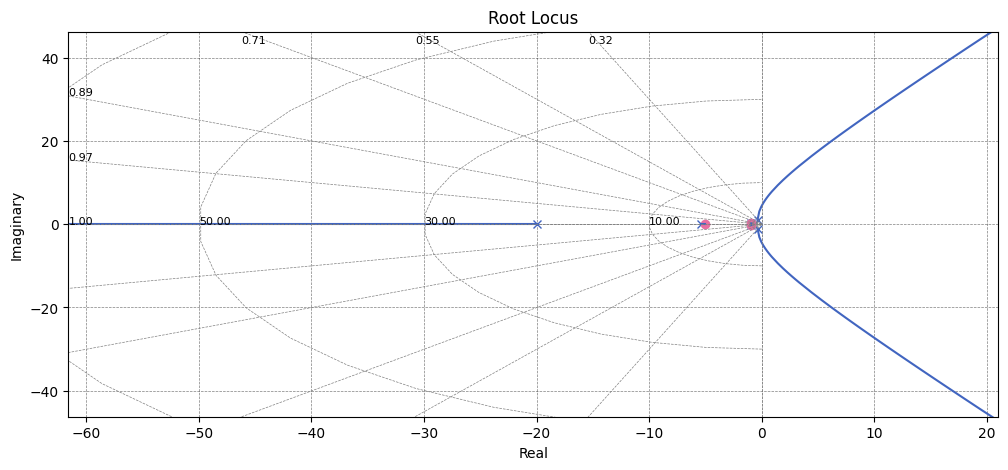

In [6]:
rl = ct.root_locus(sys)
plt.savefig('curves/rl3.eps', dpi=600, transparent=True, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


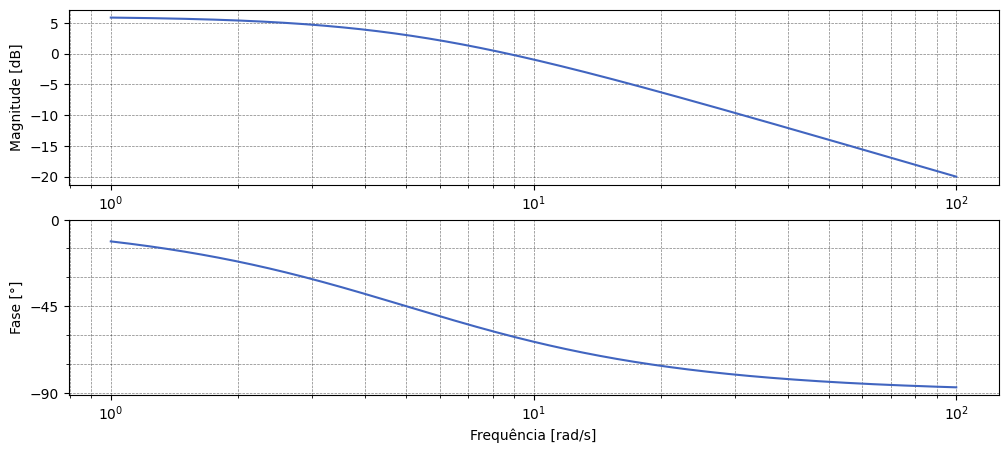

In [7]:
bd = ct.bode(H, dB=True)
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Fase [°]')
plt.subplot(2, 1, 1)
plt.ylabel('Magnitude [dB]')
plt.savefig('curves/bd3.eps', dpi=600, transparent=True, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


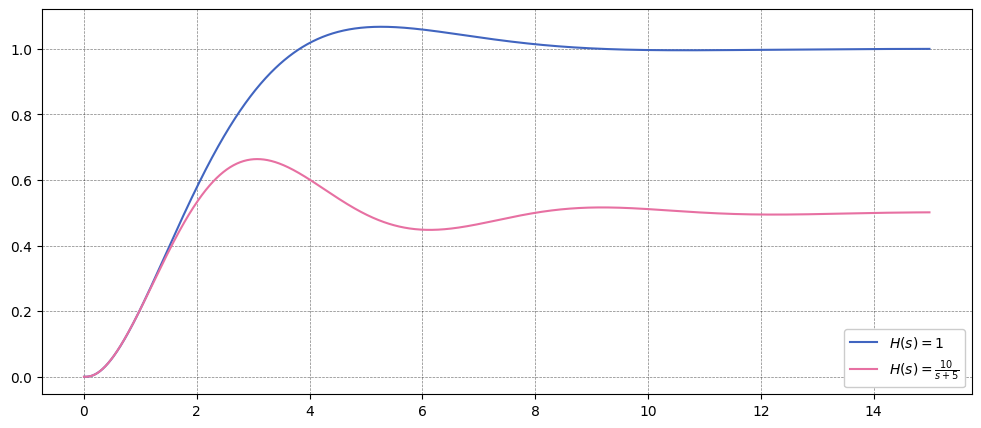

In [8]:
t = np.arange(0, 15, 1e-2)

t, y_ = ct.step_response(sys_, t)
t, y = ct.step_response(sys, t)

plt.figure(1)
plt.plot(t, y_, label='$H(s) = 1$')
plt.plot(t, y, label='$H(s) = \\frac{10}{s+5}$')
plt.legend(loc='lower right')
plt.savefig('curves/rt3.eps', dpi=600, transparent=True, bbox_inches='tight')